# clasificasion de piezas en una linea de produccion 
supongamos que una fabrica de manufactura se producen piezas que puedan ser aprovechadaos o defectuosos queremos contruir un modelo de clasificasion basado en el teorama de naive bayes. utilizasion caracteristicas como el diametro peso y rugosidad de cada piesa 

In [9]:
# importemos las librerias necesarias 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [8]:
!pip install numpy pandas matplotlib seaborn scikit-learn

In [10]:
# Generamos datos sintéticos para la clasificación
np.random.seed(42) # Fijamos semilla para reproducibilidad
# Creamos 100 muestras de piezas aprobadas
diametro_aprobado = np.random.normal(10, 1, 100) # Media 10 mm, desviación 1 mm
peso_aprobado = np.random.normal(200, 20, 100) # Media 200 g, desviación 20 g
rugosidad_aprobado = np.random.normal(0.5, 0.1, 100) # Media 0.5, desviación 0.1

In [12]:
#Creamos 100 muestras de piezas defectuosas
diametro_defectuoso = np.random.normal(12, 1.5, 100)  # Media 12 mm, desviación 1.5 mm
peso_defectuoso = np.random.normal(180, 25, 100)  # Media 180 g, desviación 25 g
rugosidad_defectuoso = np.random.normal(0.8, 0.2, 100)  # Media 0.8, desviación 0.2

In [13]:
# Concatenamos los datos
diametro = np.concatenate([diametro_aprobado, diametro_defectuoso])
peso = np.concatenate([peso_aprobado, peso_defectuoso])
rugosidad = np.concatenate([rugosidad_aprobado, rugosidad_defectuoso])
clase = np.array([0]*100 + [1]*100) # 0 = Aprobado, 1 = Defectuoso


In [14]:
# Creamos un DataFrame
df = pd.DataFrame({'Diametro': diametro, 'Peso': peso, 'Rugosidad': rugosidad, 'Clase': clase})

# Visualizamos los primeros datos
df.head()

,Diametro,Peso,Rugosidad,Clase
0,10.496714,171.692585,0.535779,0
1,9.861736,191.587094,0.556078,0
2,10.647689,193.145710,0.608305,0
3,11.523030,183.954455,0.605380,0
4,9.765847,196.774286,0.362233,0


# paso 1: visualisasion de datos 

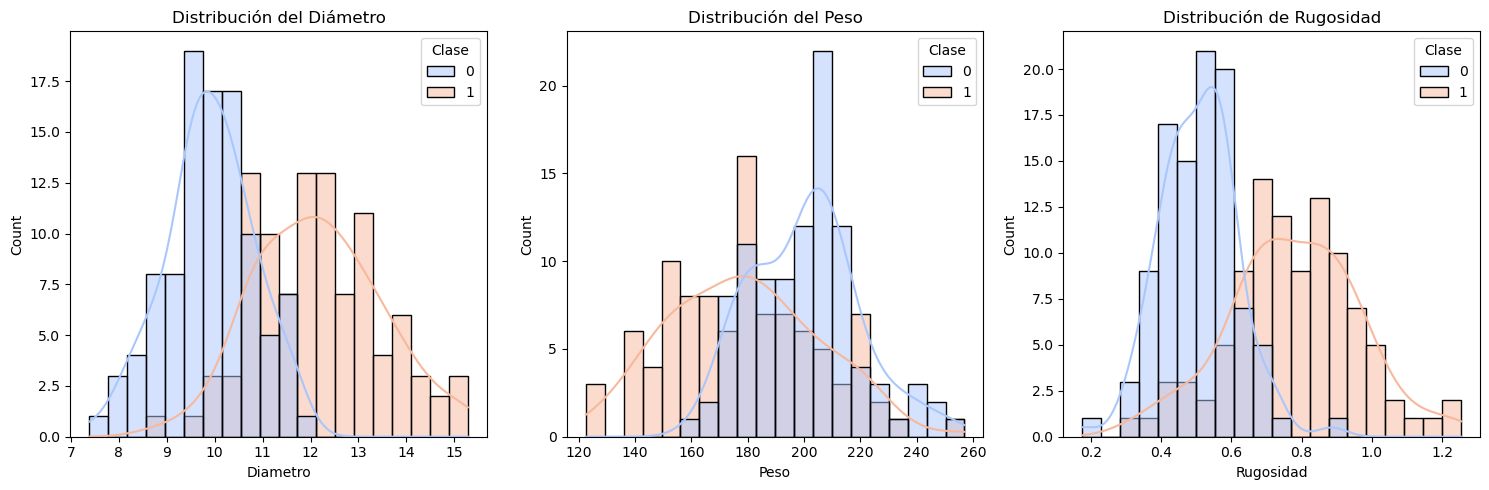

In [15]:
# Graficamos la distribución de cada característica
plt.figure(figsize=(15,5))

# Histograma de Diámetro
plt.subplot(1, 3, 1)
sns.histplot(df, x="Diametro", hue="Clase", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución del Diámetro")

# Histograma de Peso
plt.subplot(1, 3, 2)
sns.histplot(df, x="Peso", hue="Clase", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución del Peso")

# Histograma de Rugosidad
plt.subplot(1, 3, 3)
sns.histplot(df, x="Rugosidad", hue="Clase", kde=True, bins=20, palette="coolwarm")
plt.title("Distribución de Rugosidad")

plt.tight_layout()
plt.show()

## paso 2: division en conjunto de entrenamiento y prueba 


In [16]:
# Definimos características y etiquetas
X = df[['Diametro', 'Peso', 'Rugosidad']]
y = df['Clase']

# Dividimos los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


## paso 3: entrenamiento del modelo de naive Bayes 

In [18]:
# Creamos el modelo
modelo = GaussianNB()

# Entrenamos con los datos de entrenamiento
modelo.fit(X_train, y_train)

GaussianNB()

# Paso 4: Predicciones y Evaluación

In [21]:
# Realizamos predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)
#Calculamos la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)
# Reporte de Clasificación
print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))



Precisión del modelo: 0.90
Matriz de Confusión:
 [[19  2]
 [ 2 17]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        21
           1       0.89      0.89      0.89        19

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



## paso 5: visualisacion de la matriz de confusion 

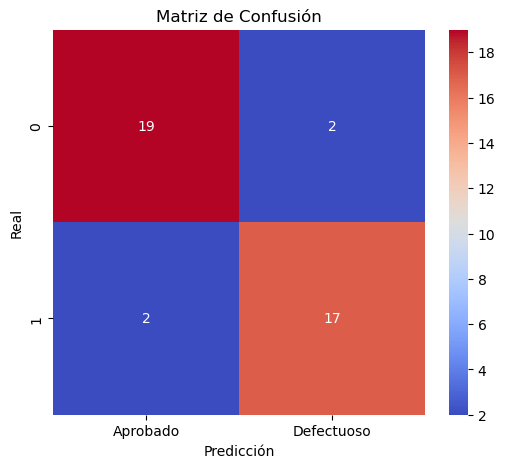

In [24]:
 # Graficamos la matriz de confusión
plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=["Aprobado", "Defectuoso"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

In [26]:
# Definir el nuevo dato como un DataFrame con los nombres de las características
nueva_pieza = pd.DataFrame([[11.2, 200, 0.40]], columns=['Diametro', 'Peso', 'Rugosidad'])

# Usamos el modelo entrenado para predecir la clase
prediccion = modelo.predict(nueva_pieza)

# Mostramos la clasificación
clases = ["Aprobado por chayanne", "Defectuoso"]
print(f"La nueva pieza ha sido clasificada como: {clases[prediccion[0]]}")

La nueva pieza ha sido clasificada como: Aprobado por chayanne
